In [1]:
import cv2
import sys
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import urllib

video_input_file_name = "/home/spydy/Downloads/car_race.mp4"

def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)

def displayRectangle(frame, bbox):
    plt.figure(figsize=[20, 10]),
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    frameCopy = cv2.cvtColor(frameCopy , cv2.COLOR_RGB2BGR)
    plt. imshow(frameCopy); plt.axis( 'off')

def drawText(frame, txt, location, color = (50,170,50)):
    cv2.putText(frame, txt, location, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

In [2]:
# Set up tracker
tracker_types = ('BOOSTING', 'MIL','KCF','CSRT','TLD','MEDIANFLOW','GOTURN','MOSSE')

# Change the index to change the tracker type
tracker_type = tracker_types[1]
if tracker_type == 'BOOSTING':
    tracker = cv2.legacy_TrackerBoosting.create()
elif tracker_type =='MIL':
    tracker = cv2.TrackerMIL_create()
# elif tracker_type == 'KCF':
#     tracker = cv2.TrackerKCF_create() 
elif tracker_type == 'CSRT':
    tracker = cv2.legacy_TrackerCSRT.create()
elif tracker_type == 'TLD' :
    tracker = cv2.legacy_TrackerTLD.create()
elif tracker_type == 'MEDIANFLOW' :
    tracker = cv2.legacy_TrackerMedianFlow.create()
elif tracker_type == 'GOTURN':
    tracker = cv2.TrackerGOTURN_create()
# else:
#     tracker = cv2.legacy_TrackerMOSSE.create()


In [3]:
# Read video
video = cv2.VideoCapture(video_input_file_name)
ok, frame = video.read()
# Exit if video not opened
if not video. isOpened():
    print( "Could not open video")
    sys.exit()
else :
    width = int (video. get (cv2.CAP_PROP_FRAME_WIDTH))
    height = int (video.get (cv2.CAP_PROP_FRAME_HEIGHT))

video_output_file_name = 'race_car' + tracker_type + '.mp4'
video_out = cv2.VideoWriter(video_output_file_name,cv2.VideoWriter_fourcc(*'mp4v'), 10, (width, height))

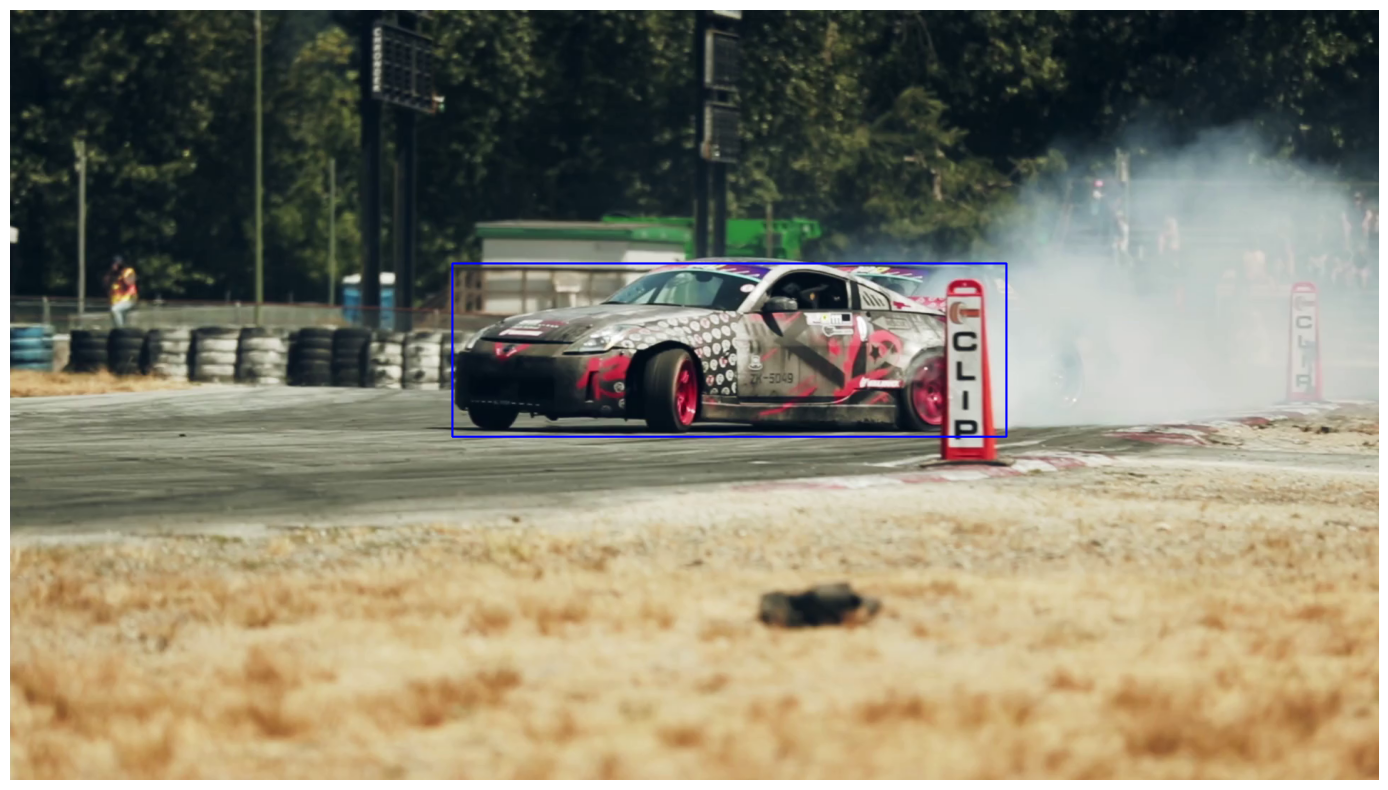

In [4]:
#Define a bounding box

bbox = (620, 355, 777, 243)
# bbox = cv2.selectROI(frame, False)
# print(bbox)
displayRectangle(frame,bbox)

In [5]:
ok = tracker. init(frame, bbox)

In [6]:
while True:
    ok, frame = video.read()
    if not ok:
        break

    # Start timer
    timer = cv2.getTickCount()

    # Update tracker
    ok, bbox = tracker. update(frame)

    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);

    # Draw bounding box
    if ok:
        drawRectangle(frame, bbox)
    else :
        drawText(frame,"Tracking failure detected", (80,140), (0, 0, 255))

    # Display Info
    drawText (frame, tracker_type + " Tracker", (80,60))
    drawText (frame,"FPS : "+ str(int(fps)), (80,100))

    # Write frame to video
    video_out.write(frame)

video.release()
video_out.release()
